In [ ]:
import os
import time
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from glob import glob
import datetime
import random
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
# matplotlib inline
import urllib
import tarfile
import xml.etree.ElementTree as ET
from imageio import imread, imsave, mimsave
import shutil
import cv2
import glob

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# current_directory=os.getcwd()
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('NYU_DL_DCGAN')

In [ ]:
'''def load_images(image_directory, num_images=12500):
    images = np.zeros((num_images, 64, 64, 3))
    idx = 0

    for img_file in glob.glob(os.path.join(image_directory, '*.jpg')):
        try:
            img = Image.open(img_file)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = img.resize((64, 64), Image.Resampling.LANCZOS)
            images[idx, :, :, :] = np.asarray(img)
            idx += 1
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

    print(f"Total images loaded: {idx}")
    return images
'''

'def load_images(image_directory, num_images=12500):\n    images = np.zeros((num_images, 64, 64, 3))\n    idx = 0\n\n    for img_file in glob.glob(os.path.join(image_directory, \'*.jpg\')):\n        try:\n            img = Image.open(img_file)\n            if img.mode != \'RGB\':\n                img = img.convert(\'RGB\')\n            img = img.resize((64, 64), Image.Resampling.LANCZOS)\n            images[idx, :, :, :] = np.asarray(img)\n            idx += 1\n        except Exception as e:\n            print(f"Error loading image {img_file}: {e}")\n\n    print(f"Total images loaded: {idx}")\n    return images\n'

In [ ]:
current_directory = os.getcwd()
image_directory = os.path.join(current_directory, 'NYU_DL_DCGAN','PetImages', 'Dog')
# images = load_images(image_directory)

idxIn = 0
imagesIn = np.zeros((12500,64,64,3))
flag = True

if flag:
  for img_file in glob.glob(os.path.join(image_directory, '*.jpg')):
    try:
      img = Image.open(img_file)
      img = img.resize((64,64), Image.Resampling.LANCZOS)
      imagesIn[idxIn,:,:,:] = np.asarray(img)
      idxIn += 1
    except:
      idxIn += 1
      continue

  idx = np.arange(idxIn)
  np.random.shuffle(idx)
  imagesIn = imagesIn[idx,:,:,:]
else:
    x = np.random.choice(np.arange(12500),5000)
    for k in range(len(x)):
        img = Image.open(image_directory + image_directory[x[k]])
        w = img.size[0]
        h = img.size[1]
        sz = np.min((w,h))
        a=0; b=0
        if w<h: b = (h-sz)//2
        else: a = (w-sz)//2
        img = img.crop((0+a, 0+b, sz+a, sz+b))
        img = img.resize((64,64), Image.ANTIALIAS)
        imagesIn[idxIn,:,:,:] = np.asarray(img)
        if idxIn%1000==0: print(idxIn)
        idxIn += 1

IMG_DIR = os.path.join(current_directory, 'Output', 'Dog')
if not os.path.exists(IMG_DIR):
    os.makedirs(IMG_DIR)
print(f"Total images loaded: {idx}")

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Total images loaded: [ 5982 10134 11604 ...  3314  6199  6829]


In [ ]:
def generator(z, output_channel_dim, training):
    with tf.variable_scope("generator", reuse= not training):

        # 4x4x512
        fully_connected = tf.layers.dense(z, 4*4*512)
        fully_connected = tf.reshape(fully_connected, (-1, 4, 4, 512))
        fully_connected = tf.nn.leaky_relu(fully_connected)

        # 4x4x512 -> 8x8x256
        trans_conv1 = tf.layers.conv2d_transpose(inputs=fully_connected,
                                                 filters=256,
                                                 kernel_size=[5,5],
                                                 strides=[2,2],
                                                 padding="SAME",
                                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                                 name="trans_conv1")
        batch_trans_conv1 = tf.layers.batch_normalization(inputs = trans_conv1,
                                                          training=training,
                                                          epsilon=EPSILON,
                                                          name="batch_trans_conv1")
        trans_conv1_out = tf.nn.leaky_relu(batch_trans_conv1,
                                           name="trans_conv1_out")

        # 8x8x256 -> 16x16x128
        trans_conv2 = tf.layers.conv2d_transpose(inputs=trans_conv1_out,
                                                 filters=128,
                                                 kernel_size=[5,5],
                                                 strides=[2,2],
                                                 padding="SAME",
                                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                                 name="trans_conv2")
        batch_trans_conv2 = tf.layers.batch_normalization(inputs = trans_conv2,
                                                          training=training,
                                                          epsilon=EPSILON,
                                                          name="batch_trans_conv2")
        trans_conv2_out = tf.nn.leaky_relu(batch_trans_conv2,
                                           name="trans_conv2_out")

        # 16x16x128 -> 32x32x64
        trans_conv3 = tf.layers.conv2d_transpose(inputs=trans_conv2_out,
                                                 filters=64,
                                                 kernel_size=[5,5],
                                                 strides=[2,2],
                                                 padding="SAME",
                                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                                 name="trans_conv3")
        batch_trans_conv3 = tf.layers.batch_normalization(inputs = trans_conv3,
                                                          training=training,
                                                          epsilon=EPSILON,
                                                          name="batch_trans_conv3")
        trans_conv3_out = tf.nn.leaky_relu(batch_trans_conv3,
                                           name="trans_conv3_out")


        # 32x32x64 -> 64x64x32
        trans_conv4 = tf.layers.conv2d_transpose(inputs=trans_conv3_out,
                                                 filters=32,
                                                 kernel_size=[5,5],
                                                 strides=[2,2],
                                                 padding="SAME",
                                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                                 name="trans_conv4")
        batch_trans_conv4 = tf.layers.batch_normalization(inputs = trans_conv4,
                                                          training=training,
                                                          epsilon=EPSILON,
                                                          name="batch_trans_conv4")
        trans_conv4_out = tf.nn.leaky_relu(batch_trans_conv4,
                                           name="trans_conv4_out")

        # 64x64x32 -> 64x64x3
        logits = tf.layers.conv2d_transpose(inputs=trans_conv4_out,
                                            filters=3,
                                            kernel_size=[5,5],
                                            strides=[1,1],
                                            padding="SAME",
                                            kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                            name="logits")
        out = tf.tanh(logits, name="out")
        return out





def discriminator(x, reuse):
    with tf.variable_scope("discriminator", reuse=reuse):

        # 64x64x3 -> 32x32x32
        conv1 = tf.layers.conv2d(inputs=x,
                                 filters=32,
                                 kernel_size=[5,5],
                                 strides=[2,2],
                                 padding="SAME",
                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                 name='conv1')
        batch_norm1 = tf.layers.batch_normalization(conv1,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm1')
        conv1_out = tf.nn.leaky_relu(batch_norm1,
                                     name="conv1_out")

        # 32x32x32 -> 16x16x64
        conv2 = tf.layers.conv2d(inputs=conv1_out,
                                 filters=64,
                                 kernel_size=[5, 5],
                                 strides=[2, 2],
                                 padding="SAME",
                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                 name='conv2')
        batch_norm2 = tf.layers.batch_normalization(conv2,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm2')
        conv2_out = tf.nn.leaky_relu(batch_norm2,
                                     name="conv2_out")

        # 16x16x64 -> 8x8x128
        conv3 = tf.layers.conv2d(inputs=conv2_out,
                                 filters=128,
                                 kernel_size=[5, 5],
                                 strides=[2, 2],
                                 padding="SAME",
                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                 name='conv3')
        batch_norm3 = tf.layers.batch_normalization(conv3,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm3')
        conv3_out = tf.nn.leaky_relu(batch_norm3,
                                     name="conv3_out")

        # 8x8x128 -> 8x8x256
        conv4 = tf.layers.conv2d(inputs=conv3_out,
                                 filters=256,
                                 kernel_size=[5, 5],
                                 strides=[1, 1],
                                 padding="SAME",
                                 kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                 name='conv4')
        batch_norm4 = tf.layers.batch_normalization(conv4,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm4')
        conv4_out = tf.nn.leaky_relu(batch_norm4,
                                     name="conv4_out")

        # 8x8x256 -> 4x4x512

        conv5 = tf.layers.conv2d(inputs=conv4_out,
                                filters=512,
                                kernel_size=[5, 5],
                                strides=[2, 2],
                                padding="SAME",
                                kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV),
                                name='conv5')
        batch_norm5 = tf.layers.batch_normalization(conv5,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm5')
        conv5_out = tf.nn.leaky_relu(batch_norm5,
                                     name="conv5_out")

        flatten = tf.reshape(conv5_out, (-1, 4*4*512))
        logits = tf.layers.dense(inputs=flatten,
                                 units=1,
                                 activation=None)
        out = tf.sigmoid(logits)
        return out, logits

In [ ]:
def model_loss(input_real, input_z, output_channel_dim):
    g_model = generator(input_z, output_channel_dim, True)

    noisy_input_real = input_real + tf.random_normal(shape=tf.shape(input_real),
                                                     mean=0.0,
                                                     stddev=random.uniform(0.0, 0.1),
                                                     dtype=tf.float32)

    d_model_real, d_logits_real = discriminator(noisy_input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                         labels=tf.ones_like(d_model_real)*random.uniform(0.9, 1.0)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=tf.zeros_like(d_model_fake)))
    d_loss = tf.reduce_mean(0.5 * (d_loss_real + d_loss_fake))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                    labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


def model_optimizers(d_loss, g_loss):
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]

    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]

    with tf.control_dependencies(gen_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=LR_D, beta1=BETA1_D).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=LR_G, beta1=BETA1_G).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, *real_dim), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate_G = tf.placeholder(tf.float32, name="lr_g")
    learning_rate_D = tf.placeholder(tf.float32, name="lr_d")
    return inputs_real, inputs_z, learning_rate_G, learning_rate_D


def show_samples(sample_images, name, epoch):
    figure, axes = plt.subplots(1, len(sample_images), figsize = (IMAGE_SIZE, IMAGE_SIZE))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample_images[index].astype('uint8')
        axis.imshow(image_array)
    plt.show()
    plt.close()
def save_samples(sample_images, name, epoch):
    # save images
    for index,img in enumerate(sample_images):
        image = Image.fromarray(img.astype('uint8') )
        image.save(name+"_"+str(epoch)+"_"+str(index)+".png")
def test(sess, input_z, out_channel_dim, epoch):
    example_z = np.random.uniform(-1, 1, size=[SAMPLES_TO_SHOW, input_z.get_shape().as_list()[-1]])
    samples = sess.run(generator(input_z, out_channel_dim, False), feed_dict={input_z: example_z})
    sample_images = [((sample + 1.0) * 127.5).astype(np.uint8) for sample in samples]
    show_samples(sample_images, IMG_DIR + "samples", epoch)
def generate (sess, input_z, out_channel_dim):
    print (">> Generating 1k images ...")
    for i in tqdm(range(100)):
        example_z = np.random.uniform(-1, 1, size=[100, 100]).astype(np.float32)
        imgs = sess.run(generator(input_z, out_channel_dim, False), feed_dict={input_z: example_z})
        imgs = [((img + 1.0) * 127.5).astype(np.uint8) for img in imgs]
        for j in range(len(imgs)):
            imsave(os.path.join(IMG_DIR, f'dog_{i}_{j}.png'), imgs[j])
def summarize_epoch(epoch, duration, sess, d_losses, g_losses, input_z, data_shape):
    minibatch_size = int(data_shape[0]//BATCH_SIZE)
    print("Epoch {}/{}".format(epoch, EPOCHS),
          "\nDuration: {:.5f}".format(duration),
          "\nD Loss: {:.5f}".format(np.mean(d_losses[-minibatch_size:])),
          "\nG Loss: {:.5f}".format(np.mean(g_losses[-minibatch_size:])))

    fig, ax = plt.subplots()
    plt.plot(d_losses, label='Discriminator', alpha=0.6)
    plt.plot(g_losses, label='Generator', alpha=0.6)
    plt.title("Losses")
    plt.legend()
    #plt.savefig(OUTPUT_DIR + "losses_" + str(epoch) + ".png")
    plt.show()
    plt.close()
    test(sess, input_z, data_shape[3], epoch)
def get_batches(data):
    batches = []
    for i in range(int(data.shape[0]//BATCH_SIZE)):
        batch = data[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        augmented_images = []
        for img in batch:
            image = Image.fromarray(img.astype('uint8'))
            if random.choice([True, False]):
                image = image.transpose(Image.FLIP_LEFT_RIGHT)
            augmented_images.append(np.asarray(image))
        batch = np.asarray(augmented_images)
        normalized_batch = (batch / 127.5) - 1.0
        batches.append(normalized_batch)
    return batches



def train(get_batches, data_shape, LR_G = 2e-4, LR_D = 0.0005):
    input_images, input_z, lr_G, lr_D = model_inputs(data_shape[1:], NOISE_SIZE)
    d_loss, g_loss = model_loss(input_images, input_z, data_shape[3])
    d_opt, g_opt = model_optimizers(d_loss, g_loss)
    generator_epoch_loss = 0
    train_d_losses = []
    train_g_losses = []
    generator_epoch_loss = 999

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        epoch = 0
        iteration = 0
        d_losses = []
        g_losses = []

        for epoch in tqdm(range(EPOCHS)):
            epoch += 1
            start_time = time.time()

            for batch_images in get_batches:
                iteration += 1
                batch_z = np.random.uniform(-1, 1, size=(BATCH_SIZE, NOISE_SIZE))
                _ = sess.run(d_opt, feed_dict={input_images: batch_images, input_z: batch_z, lr_D: LR_D})
                _ = sess.run(g_opt, feed_dict={input_images: batch_images, input_z: batch_z, lr_G: LR_G})
                d_losses.append(d_loss.eval({input_z: batch_z, input_images: batch_images}))
                g_losses.append(g_loss.eval({input_z: batch_z}))

            summarize_epoch(epoch, time.time()-start_time, sess, d_losses, g_losses, input_z, data_shape)
            minibatch_size = int(data_shape[0]//BATCH_SIZE)
            generator_epoch_loss = np.mean(g_losses[-minibatch_size:])
            train_d_losses.append(np.mean(d_losses[-minibatch_size:]))
            train_g_losses.append(np.mean(g_losses[-minibatch_size:]))

            if epoch == EPOCHS:
                generate (sess, input_z, out_channel_dim=3)

    fig, ax = plt.subplots()
    plt.plot(train_d_losses, label='Discriminator', alpha=0.5)
    plt.plot(train_g_losses, label='Generator', alpha=0.5)
    plt.title("Training Losses")
    plt.legend()
    plt.savefig('train_losses.png')
    plt.show()
    plt.close()

In [ ]:
IMAGE_SIZE = 64
NOISE_SIZE = 100
LR_D = 0.0005
LR_G = 2e-4
BATCH_SIZE = 64
EPOCHS = 100
BETA1_G = 0.5
BETA1_D = 0.5
WEIGHT_INIT_STDDEV = 0.02
MOMENTUM = 0.9
EPSILON = 0.0005
SAMPLES_TO_SHOW = 25 # each epoch

In [ ]:
start = time.time()

print(">> Start training...")
with tf.Graph().as_default():
    train(get_batches(imagesIn), imagesIn.shape)

print(">> train time = ",time.time() - start)

In [ ]:
cd Output/Dog

/content/Output/Dog


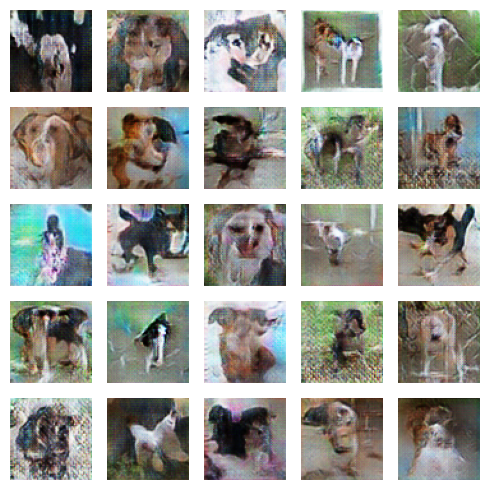

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os



fig,axs = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))
axs = axs.ravel()

image_names = [f'dog_18_{i}.png' for i in range(50,75)]


for ax,image_name in zip(axs,image_names):
  if os.path.exists(os.path.join(image_name)):
    image = Image.open(os.path.join(image_name))
    ax.imshow(image)
    ax.axis('off')

  else:
    ax.axis('off')

plt.tight_layout()
plt.savefig('/content/combined_image.png')  # Save the figure as a PNG file
plt.show()
